# **Yield Comparison between FAO and Pangaea Data**

## **Import Required Libraries**

In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point
from tqdm import tqdm
import os
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings("ignore")

plt.rcParams["font.family"] = "DeJavu Serif"
plt.rcParams["font.serif"] = "Times New Roman"

## **Read the FAO Yield Data**

In [144]:
# Read the FAO data
fao_data_path = r"D:\Research Works\Agriculture\ssa_crop_yield_forecasting\datasets\FAOSTAT_data_SSA_Maize_1961-2022.csv"
fao_df = pd.read_csv(fao_data_path)
print(fao_df.shape)
fao_df.head()

(3043, 5)


Area Element          Item  Year  Yield(tons/ha)
0  Algeria   Yield  Maize (corn)  1961          0.9746
1  Algeria   Yield  Maize (corn)  1962          0.5400
2  Algeria   Yield  Maize (corn)  1963          1.0716
3  Algeria   Yield  Maize (corn)  1964          1.1703
4  Algeria   Yield  Maize (corn)  1965          1.1000

In [145]:
# Change the name of the few countries 
new_country_names = {
    "C?te d'Ivoire": "Côte d'Ivoire",
    "Cabo Verde": "Cape Verde"
}

fao_df.replace(to_replace=new_country_names, inplace=True)
print(fao_df.shape)
fao_df.head()

(3043, 5)


Area Element          Item  Year  Yield(tons/ha)
0  Algeria   Yield  Maize (corn)  1961          0.9746
1  Algeria   Yield  Maize (corn)  1962          0.5400
2  Algeria   Yield  Maize (corn)  1963          1.0716
3  Algeria   Yield  Maize (corn)  1964          1.1703
4  Algeria   Yield  Maize (corn)  1965          1.1000

In [146]:
# Check the number of countries in the FAO data
print("Number of countries in the FAO data:", fao_df["Area"].nunique())

# Store the name of the countries in a specific variable
fao_countries = fao_df["Area"].unique()
fao_countries

Number of countries in the FAO data: 53


array(['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso',
       'Burundi', 'Cape Verde', 'Cameroon', 'Central African Republic',
       'Chad', 'Comoros', 'Congo', "Côte d'Ivoire",
       'Democratic Republic of the Congo', 'Djibouti', 'Egypt', 'Eritrea',
       'Eswatini', 'Ethiopia', 'Ethiopia PDR', 'Gabon', 'Gambia', 'Ghana',
       'Guinea', 'Guinea-Bissau', 'Kenya', 'Lesotho', 'Libya',
       'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius',
       'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'R?union',
       'Rwanda', 'Sao Tome and Principe', 'Senegal', 'Sierra Leone',
       'Somalia', 'South Africa', 'South Sudan', 'Sudan',
       'Sudan (former)', 'Togo', 'Uganda', 'United Republic of Tanzania',
       'Zambia', 'Zimbabwe'], dtype=object)

## **Read the Africa Shapefile**

In [147]:
# Read the africa shapefile
africa_shp_path = r"D:\Research Works\Agriculture\ssa_crop_yield_forecasting\datasets\Africa_Country_Boundary\afr_g2014_2013_0.shp"
africa_gdf = gpd.read_file(africa_shp_path)
print(africa_gdf.shape)
africa_gdf.head()

(59, 24)


ADM0_CODE     ADM0_NAME CONTINENT ISO3 ISO2    UNI UNDP  FAOSTAT  GAUL  \
0          6         Sudan    Africa  SDN   SD  729.0  SUD    276.0   6.0   
1          8        Angola    Africa  AGO   AO   24.0  ANG      7.0   8.0   
2         29         Benin    Africa  BEN   BJ  204.0  BEN     53.0  29.0   
3         35      Botswana    Africa  BWA   BW   72.0  BOT     20.0  35.0   
4         42  Burkina Faso    Africa  BFA   BF  854.0  BKF    233.0  42.0   

    RIC_ISO3  ... CRA  ECOWAS  IGAD  IOC  SADC  CICOS  ICPAC  BDMS  MOI  \
0  ICPAC-SDN  ...   0       0     4    0     0    0.0   14.0   0.0  NaN   
1   BDMS-AGO  ...   0       0     0    0     6    0.0    0.0  16.0  NaN   
2    CRA-BEN  ...  13       3     0    0     0    0.0    0.0   0.0  NaN   
3   BDMS-BWA  ...   0       0     0    0     6    0.0    0.0  16.0  NaN   
4    CRA-BFA  ...  13       3     0    0     0    0.0    0.0   0.0  NaN   

                                            geometry  
0  MULTIPOLYGON (((38.58148 18.02542, 38.58203 18...  
1  MULTIPOLYGON (((11.79481 -16.81925, 11.79375 -...  
2  MULTIPOLYGON (((1.86343 6.28872, 1.86292 6.288...  
3  POLYGON ((25.17447 -17.77881, 25.18476 -17.783...  
4  POLYGON ((-0.45567 15.08082, -0.45411 15.07937...  

[5 rows x 24 columns]

In [148]:
# Check the number of countries in the shapefile
print("Number of countries in the shapefile:", africa_gdf["ADM0_NAME"].nunique())

# Store the name of the countries in a specific variable
shp_countries = africa_gdf["ADM0_NAME"].unique()
shp_countries

Number of countries in the shapefile: 59


array(['Sudan', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Cameroon',
       'Cape Verde', 'Central African Republic', 'Chad', 'Comoros',
       'Congo', "Côte d'Ivoire", 'Democratic Republic of the Congo',
       'Djibouti', 'South Sudan', 'Equatorial Guinea', 'Eritrea',
       'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea-Bissau', 'Guinea',
       'Kenya', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali',
       'Mauritania', 'Mauritius', 'Mozambique', 'Namibia', 'Niger',
       'Nigeria', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia',
       'South Africa', 'Swaziland', 'Togo', 'Uganda',
       'United Republic of Tanzania', 'Zambia', 'Zimbabwe', 'Algeria',
       'Burundi', 'Abyei', 'Libya', 'Morocco', 'Rwanda',
       'Sao Tome and Principe', 'Tunisia', 'Western Sahara',
       "Hala'ib triangle", "Ma'tan al-Sarra", 'Egypt', 'Ilemi triangle'],
      dtype=object)

## **Check the Common Countries**

In [149]:
# Check the common and uncommon countries in both the dataframe
common_countries = set(fao_countries).intersection(set(shp_countries))
uncommon_countries = set(fao_countries).difference(set(shp_countries))

In [150]:
# Filter the CSV with the common countries
filtered_fao_df = fao_df[fao_df["Area"].isin(common_countries)]
print(filtered_fao_df.shape)
filtered_fao_df.head()

(2852, 5)


Area Element          Item  Year  Yield(tons/ha)
0  Algeria   Yield  Maize (corn)  1961          0.9746
1  Algeria   Yield  Maize (corn)  1962          0.5400
2  Algeria   Yield  Maize (corn)  1963          1.0716
3  Algeria   Yield  Maize (corn)  1964          1.1703
4  Algeria   Yield  Maize (corn)  1965          1.1000

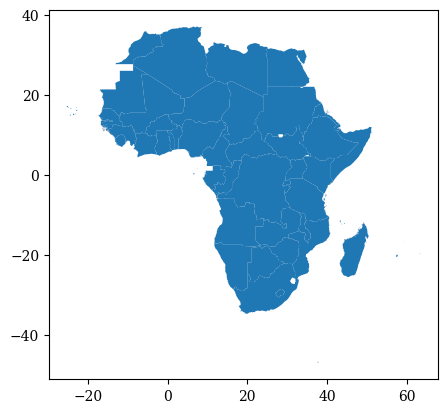

In [151]:
# Filter the geodataframe with the common countries
filtered_africa_gdf = africa_gdf[africa_gdf["ADM0_NAME"].isin(common_countries)]
filtered_africa_gdf.plot();

## **Read the Pangaea Yield Data**

In [152]:
# Read the Pangaea yield data
yield_data_path = r"D:\Research Works\Agriculture\Africa\Africa_paper\Crops_Yield\maize.csv"
yield_df = pd.read_csv(yield_data_path)
print(yield_df.shape)
yield_df.head()

(10226, 38)


Lon    Lat  1981  1982  1983  1984  1985  1986  1987  1988  ...  2007  \
0 -24.75  16.75   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
1 -23.75  15.25   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
2 -17.25  14.75   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
3 -16.75  12.75   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
4 -16.75  13.25   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   

   2008  2009  2010  2011  2012  2013  2014  2015  2016  
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
4   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  

[5 rows x 38 columns]

In [153]:
# Drop the rows with null values across all years
null_rows_index = yield_df.iloc[:, 2:].isnull().sum(axis=1)
null_rows_index = null_rows_index[null_rows_index==36].index

# Drop the null rows from the dataframe
yield_df.drop(index=null_rows_index, inplace=True)
print(yield_df.shape)
yield_df.head()

(5082, 38)


Lon    Lat      1981      1982      1983      1984      1985      1986  \
6  -16.75  14.75  0.472825  0.376438  0.206165  0.306877  0.561544  0.291398   
11 -16.25  12.75  1.433674  1.227325  1.168139  1.873190  1.864365  1.473679   
13 -16.25  13.75  0.873517  0.644513  0.508204  0.843970  0.978451  0.758092   
14 -16.25  14.25  0.780837  0.505755  0.309610  0.586465  0.868196  0.592568   
15 -16.25  14.75  0.439209  0.344943  0.213096  0.270765  0.438526  0.261500   

        1987      1988  ...      2007      2008      2009      2010      2011  \
6   0.372327  0.327649  ...  0.295032  0.533454  0.609084  0.548866  0.273706   
11  1.464842  1.436291  ...  1.454072  2.212240  1.927233  1.779845  1.506943   
13  0.735792  0.665472  ...  0.587343  1.092225  0.975417  0.925198  0.601326   
14  0.523936  0.490515  ...  0.399388  0.883483  0.714394  0.766167  0.424743   
15  0.302742  0.300420  ...  0.205778  0.634867  0.539136  0.486485  0.316431   

        2012      2013      2014      2015      2016  
6   0.655873  0.408065  0.317520  0.582995  0.529290  
11  1.810503  1.733871  1.648368  1.999163  2.100773  
13  0.957940  0.740045  0.727029  0.840273  1.068431  
14  0.716934  0.690992  0.389206  0.715049  0.570394  
15  0.662432  0.548353  0.250637  0.706258  0.605660  

[5 rows x 38 columns]

In [154]:
# Convert the yield data into geodataframe
yield_df_geometry = [Point(xy) for xy in zip(yield_df["Lon"], yield_df["Lat"])]

yield_gdf = gpd.GeoDataFrame(yield_df, geometry=yield_df_geometry, crs="EPSG:4326")
print(yield_gdf.shape)
yield_gdf.head()

(5082, 39)


Lon    Lat      1981      1982      1983      1984      1985      1986  \
6  -16.75  14.75  0.472825  0.376438  0.206165  0.306877  0.561544  0.291398   
11 -16.25  12.75  1.433674  1.227325  1.168139  1.873190  1.864365  1.473679   
13 -16.25  13.75  0.873517  0.644513  0.508204  0.843970  0.978451  0.758092   
14 -16.25  14.25  0.780837  0.505755  0.309610  0.586465  0.868196  0.592568   
15 -16.25  14.75  0.439209  0.344943  0.213096  0.270765  0.438526  0.261500   

        1987      1988  ...      2008      2009      2010      2011      2012  \
6   0.372327  0.327649  ...  0.533454  0.609084  0.548866  0.273706  0.655873   
11  1.464842  1.436291  ...  2.212240  1.927233  1.779845  1.506943  1.810503   
13  0.735792  0.665472  ...  1.092225  0.975417  0.925198  0.601326  0.957940   
14  0.523936  0.490515  ...  0.883483  0.714394  0.766167  0.424743  0.716934   
15  0.302742  0.300420  ...  0.634867  0.539136  0.486485  0.316431  0.662432   

        2013      2014      2015      2016                    geometry  
6   0.408065  0.317520  0.582995  0.529290  POINT (-16.75000 14.75000)  
11  1.733871  1.648368  1.999163  2.100773  POINT (-16.25000 12.75000)  
13  0.740045  0.727029  0.840273  1.068431  POINT (-16.25000 13.75000)  
14  0.690992  0.389206  0.715049  0.570394  POINT (-16.25000 14.25000)  
15  0.548353  0.250637  0.706258  0.605660  POINT (-16.25000 14.75000)  

[5 rows x 39 columns]

## **Compare the Yields between Pangaea and FAO Data**

In [155]:
# Write a function to compare the yield
def compare_fao_and_pangaea(roi_shp, fao_df, pangaea_gdf, coutries):

    # Create a blank dataframe to store the data for all the countries
    final_merged_df = pd.DataFrame()
    point_count = {}

    for country in tqdm(coutries):
        print(country)
        country_geom = roi_shp[roi_shp["ADM0_NAME"]==country]
        country_geom = country_geom[["ADM0_NAME", "geometry"]]

        # Extract the Pangaea yield
        points_gdf = gpd.sjoin(country_geom, pangaea_gdf, how="inner", predicate="intersects")
        print(f"Number of points falling in {country}:", points_gdf.shape[0])
        point_count[country] = points_gdf.shape[0]
        points_df = points_gdf.iloc[:, 5:]
        yearly_yield = points_df.mean(axis=0)
        pangaea_yearly_yield_df = pd.DataFrame({"Year": yearly_yield.index, "Pangaea_Yield(tons/ha)": yearly_yield.values})
        pangaea_yearly_yield_df.dropna(inplace=True)
        pangaea_yearly_yield_df = pangaea_yearly_yield_df.astype("float32")

        # Extract the FAO yield data for the country
        country_fao_yield = fao_df[fao_df["Area"]==country]

        # Merge both the dataframe
        yield_merged = pd.merge(left=country_fao_yield, right=pangaea_yearly_yield_df, how="inner", on="Year")
        yield_merged.rename(columns={"Yield(tons/ha)": "FAO_Yield(tons/ha)"}, inplace=True)
        print("Done.\n")

        final_merged_df = pd.concat((final_merged_df, yield_merged), axis=0)
        final_merged_df.sort_values(by=["Area", "Year"], inplace=True)

    point_count_df = pd.DataFrame({"Area":point_count.keys(), "No_of_Points": point_count.values()})
    return final_merged_df, point_count_df

In [156]:
# Apply the function
merged_df, point_count_df = compare_fao_and_pangaea(roi_shp=filtered_africa_gdf, 
                                                    fao_df=fao_df,
                                                    pangaea_gdf=yield_gdf,
                                                    coutries=common_countries)
merged_df

  0%|          | 0/49 [00:00<?, ?it/s]

Algeria
Number of points falling in Algeria: 0
Done.

Burkina Faso
Number of points falling in Burkina Faso: 87
Done.

South Africa
Number of points falling in South Africa: 299
Done.

Rwanda
Number of points falling in Rwanda: 10
Done.

Ghana


 10%|█         | 5/49 [00:00<00:00, 48.48it/s]

Number of points falling in Ghana: 73
Done.

Nigeria
Number of points falling in Nigeria: 291
Done.

Sierra Leone
Number of points falling in Sierra Leone: 21
Done.

Sudan
Number of points falling in Sudan: 21
Done.

Burundi
Number of points falling in Burundi: 10
Done.

Gabon
Number of points falling in Gabon: 54
Done.

Guinea
Number of points falling in Guinea: 74
Done.

Morocco


 24%|██▍       | 12/49 [00:00<00:00, 57.29it/s]

Number of points falling in Morocco: 51
Done.

Niger
Number of points falling in Niger: 21
Done.

Côte d'Ivoire
Number of points falling in Côte d'Ivoire: 103
Done.

Uganda
Number of points falling in Uganda: 74
Done.

Malawi
Number of points falling in Malawi: 37
Done.

Angola
Number of points falling in Angola: 391
Done.

United Republic of Tanzania
Number of points falling in United Republic of Tanzania: 291
Done.

Mali


 39%|███▉      | 19/49 [00:00<00:00, 61.86it/s]

Number of points falling in Mali: 135
Done.

Kenya
Number of points falling in Kenya: 173
Done.

Namibia
Number of points falling in Namibia: 163
Done.

Togo
Number of points falling in Togo: 17
Done.

Eritrea
Number of points falling in Eritrea: 23
Done.

Zimbabwe


 55%|█████▌    | 27/49 [00:00<00:00, 66.22it/s]

Number of points falling in Zimbabwe: 135
Done.

Botswana
Number of points falling in Botswana: 117
Done.

Egypt
Number of points falling in Egypt: 33
Done.

Mauritius
Number of points falling in Mauritius: 0
Done.

Lesotho
Number of points falling in Lesotho: 12
Done.

Sao Tome and Principe
Number of points falling in Sao Tome and Principe: 0
Done.

South Sudan
Number of points falling in South Sudan: 162
Done.

Cape Verde
Number of points falling in Cape Verde: 0
Done.

Mozambique
Number of points falling in Mozambique: 228
Done.



 71%|███████▏  | 35/49 [00:00<00:00, 68.34it/s]

Cameroon
Number of points falling in Cameroon: 119
Done.

Somalia
Number of points falling in Somalia: 78
Done.

Ethiopia
Number of points falling in Ethiopia: 258
Done.

Benin
Number of points falling in Benin: 37
Done.

Senegal
Number of points falling in Senegal: 56
Done.

Congo
Number of points falling in Congo: 73
Done.

Democratic Republic of the Congo
Number of points falling in Democratic Republic of the Congo: 597
Done.

Chad
Number of points falling in Chad: 167
Done.

Gambia
Number of points falling in Gambia: 2
Done.

Guinea-Bissau


 86%|████████▌ | 42/49 [00:00<00:00, 65.24it/s]

Number of points falling in Guinea-Bissau: 6
Done.

Djibouti
Number of points falling in Djibouti: 0
Done.

Comoros
Number of points falling in Comoros: 0
Done.

Central African Republic
Number of points falling in Central African Republic: 110
Done.

Madagascar
Number of points falling in Madagascar: 166
Done.

Mauritania


100%|██████████| 49/49 [00:00<00:00, 64.86it/s]

Number of points falling in Mauritania: 45
Done.

Libya
Number of points falling in Libya: 0
Done.

Zambia
Number of points falling in Zambia: 250
Done.



Area Element          Item  Year  FAO_Yield(tons/ha)  \
0     Angola   Yield  Maize (corn)  1981              0.4167   
1     Angola   Yield  Maize (corn)  1982              0.4167   
2     Angola   Yield  Maize (corn)  1983              0.4583   
3     Angola   Yield  Maize (corn)  1984              0.4333   
4     Angola   Yield  Maize (corn)  1985              0.4167   
..       ...     ...           ...   ...                 ...   
30  Zimbabwe   Yield  Maize (corn)  2012              0.7912   
31  Zimbabwe   Yield  Maize (corn)  2013              0.7449   
32  Zimbabwe   Yield  Maize (corn)  2014              0.9301   
33  Zimbabwe   Yield  Maize (corn)  2015              0.5803   
34  Zimbabwe   Yield  Maize (corn)  2016              0.4405   

    Pangaea_Yield(tons/ha)  
0                 0.707304  
1                 0.494969  
2                 0.520497  
3                 0.494311  
4                 0.421358  
..                     ...  
30                0.980557  
31                0.711603  
32                0.878154  
33                0.564656  
34                0.624318  

[1413 rows x 6 columns]

In [157]:
# Save the dataframes
output_path = r"D:\Research Works\Agriculture\ssa_crop_yield_forecasting\datasets\processed_datasets"
# merged_df.to_csv(os.path.join(output_path, "fao_and_pangaea_yield.csv"), index=False)
# point_count_df.to_csv(os.path.join(output_path, "point_per_country.csv"), index=False)

## **Plot the Data**

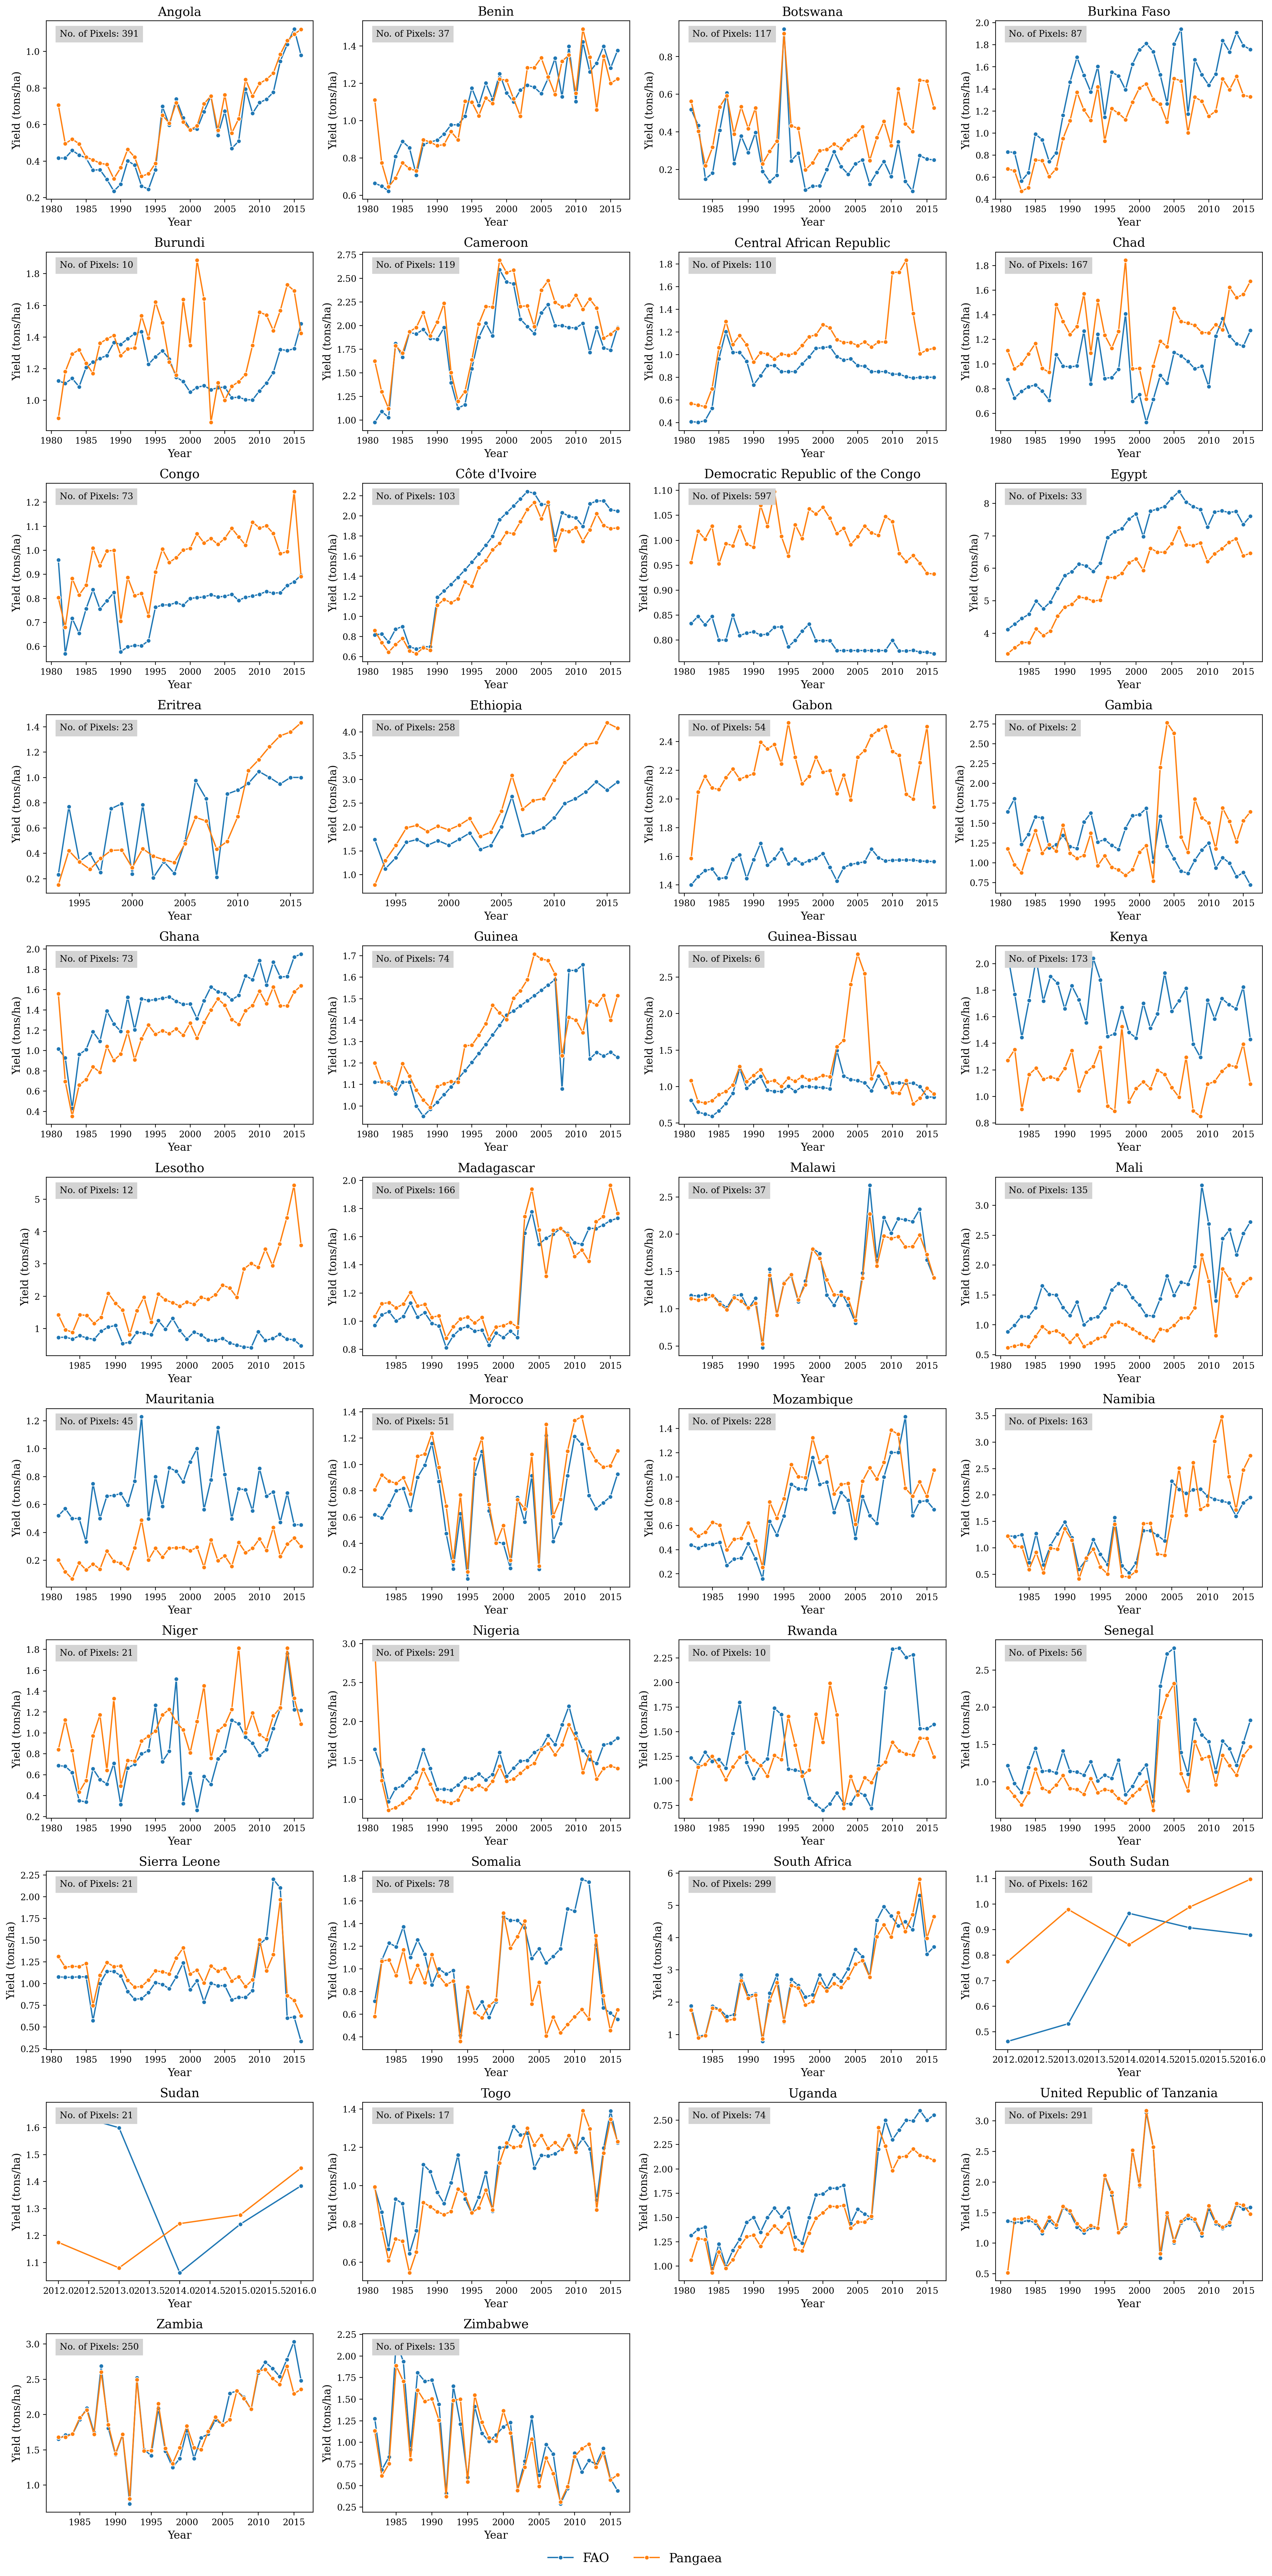

In [158]:
# Plot the timeseries plot
fig, axes = plt.subplots(ncols=4, nrows=11, figsize=(20, 40), dpi=200)
axes = axes.flatten()

for index, country in enumerate(merged_df["Area"].unique()):
    sns.lineplot(data=merged_df[merged_df["Area"]==country], x="Year", y="FAO_Yield(tons/ha)",
                 marker="o", markersize=5, ax=axes[index], label="FAO")
    sns.lineplot(merged_df[merged_df["Area"]==country], x="Year", y="Pangaea_Yield(tons/ha)",
                 marker="o", markersize=5, ax=axes[index], label="Pangaea")
    
    number_of_points = point_count_df[point_count_df["Area"]==country]["No_of_Points"].values[0]

    axes[index].set_xlabel("Year", fontsize=12)
    axes[index].set_ylabel("Yield (tons/ha)", fontsize=12)
    axes[index].set_title(country, fontsize=14)

    # Annotate the subplot with RMSE and R^2
    axes[index].text(0.05, 0.95, f'No. of Pixels: {number_of_points}', transform=axes[index].transAxes, verticalalignment='top', backgroundcolor="lightgrey", fontsize=10)

    axes[index].legend().remove()

# Turn off the unused axes
for ax in axes[len(merged_df["Area"].unique()):]:
    ax.set_visible(False)

# Extract handles and labels from the first subplot with data
handles, labels = axes[0].get_legend_handles_labels()

# Create a single legend for the entire figure
fig.legend(handles, labels, loc='lower center', fontsize=14, ncol=2, bbox_to_anchor=(0.5, -0.01), frameon=False)

plt.tight_layout()
plt.show()

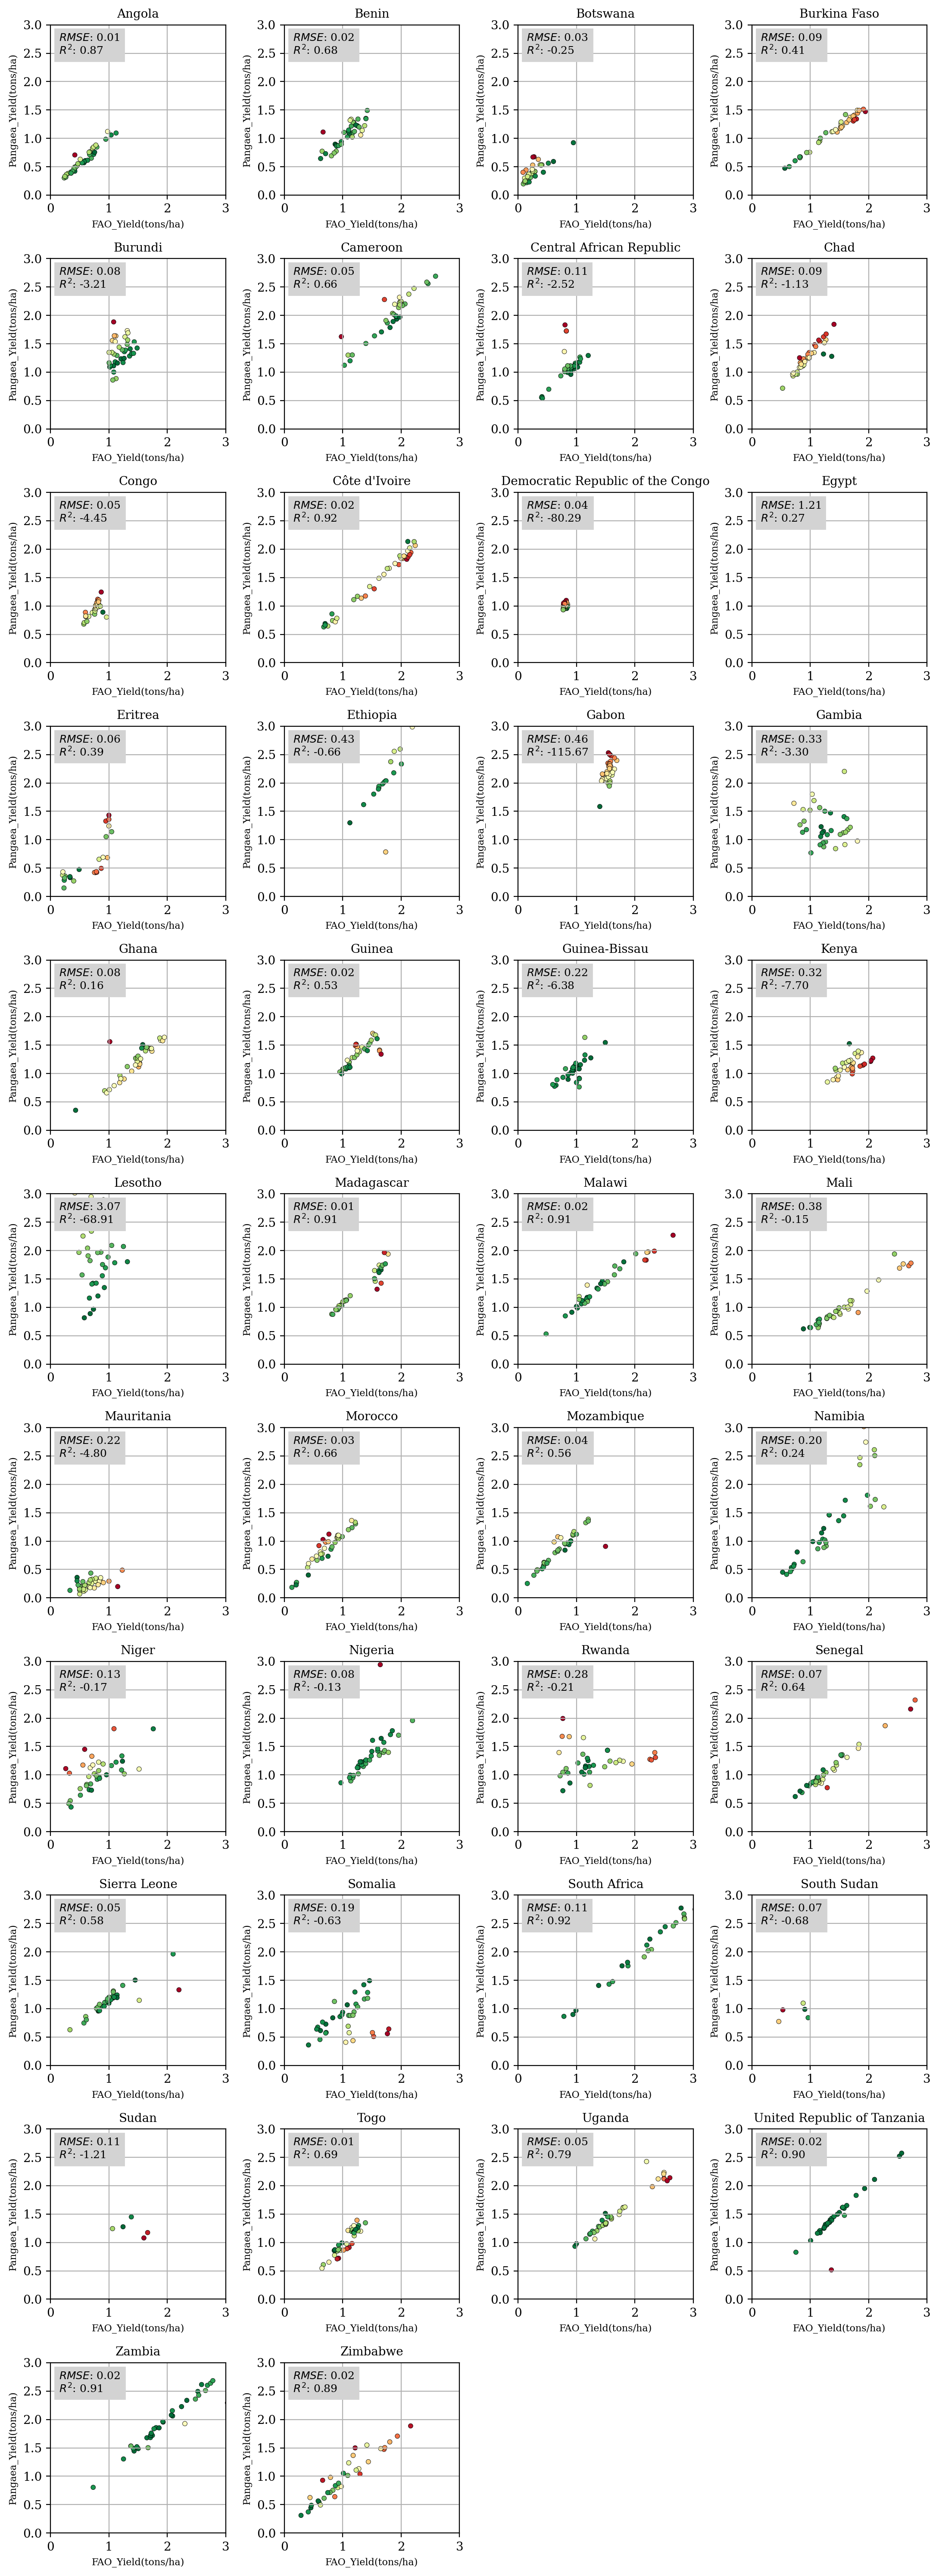

In [159]:
# Plot the scatterplot between FAO and Pangaea data
fig, axes = plt.subplots(ncols=4, nrows=11, figsize=(11, 30), dpi=200)
axes = axes.flatten()

for index, country in enumerate(merged_df["Area"].unique()):
    country_data = merged_df[merged_df["Area"]==country]
    country_data["Yield_Diff"] = np.abs(country_data["FAO_Yield(tons/ha)"]-country_data["Pangaea_Yield(tons/ha)"])

    # Calculate the R2 Score and RMSE
    r2 = np.round(r2_score(y_true=country_data["FAO_Yield(tons/ha)"], y_pred=country_data["Pangaea_Yield(tons/ha)"]), 2)
    rmse = mean_squared_error(y_true=country_data["FAO_Yield(tons/ha)"], y_pred=country_data["Pangaea_Yield(tons/ha)"])

    sns.scatterplot(data=country_data, x="FAO_Yield(tons/ha)", y="Pangaea_Yield(tons/ha)", hue="Yield_Diff",
                    palette="RdYlGn_r", s=15, edgecolor="black", ax=axes[index])
    
    axes[index].set_xlabel("FAO_Yield(tons/ha)", fontsize=8)
    axes[index].set_ylabel("Pangaea_Yield(tons/ha)", fontsize=8)
    axes[index].set_title(country, fontsize=10)
    axes[index].set_xlim([0, 3])
    axes[index].set_ylim([0, 3])
    axes[index].grid()

    axes[index].legend().remove()

    # Annotate the subplot with RMSE and R^2
    axes[index].text(0.05, 0.95, f'$RMSE$: {rmse:.2f}\n$R^2$: {r2:.2f}', 
                     transform=axes[index].transAxes, verticalalignment='top', backgroundcolor="lightgrey", fontsize=9)

# Turn off the unused axes
for ax in axes[len(merged_df["Area"].unique()):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()